# Assignment 2
Raghav Juyal\
EP20BTECH11018

# Imports

In [11]:
import numpy as np
from scipy import stats as st
from scipy.optimize import curve_fit
import astropy as ap
import astroML.stats as aml
import pandas as pd
import matplotlib.pyplot as plt

# Question 1
In the class, we demonstrated the Central Limit Theorem for a sample drawn from a uniform distribution.\
Reproduce a similar plot for a sample drawn the from chi-square distribution with degrees of freedom\
equal to 3, for samples drawn once, 5 times, and 10 times. Either plot all of these on one multipanel figure\
similar to AstroML figure 3.20.

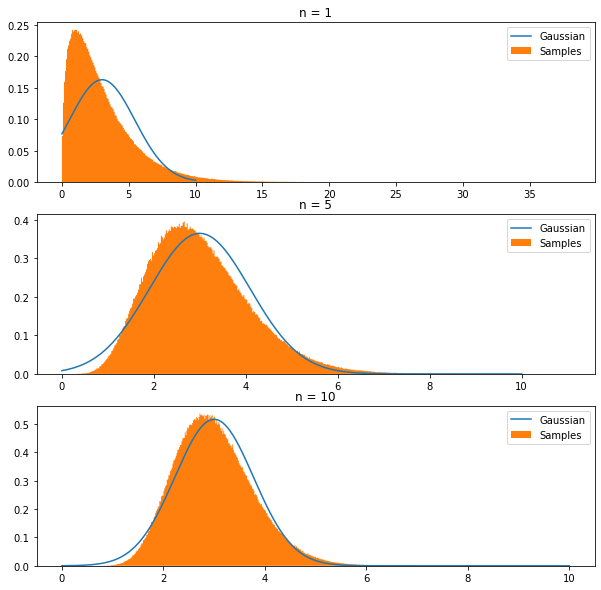

In [12]:
n = [1, 5, 10]
plt.figure(figsize=(10, 10))

for i in range(len(n)):

    # Generate random numbers    
    chisample = np.random.chisquare(3, (n[i], 10**6))
    # Mean of samples
    chimean = chisample.mean(axis=0)
    
    plt.subplot(3, 1, i+1)


    # Plotting Gaussian
    x = np.linspace(0, 10, 1000)
    gauss = st.norm.pdf(x, chimean.mean(), np.sqrt(chimean.var()))
    plt.plot(x, gauss, label='Gaussian')
    # Plotting histogram
    
    plt.hist(chimean, bins=500, density=True, histtype='stepfilled', label='Samples')
    plt.title('n = {}'.format(n[i]))
    plt.legend()



plt.show()

# Question 2
The luminosity and redshift of galaxy clusters from XMM-BCS survey (details available at arXiv:1512.01244)\
can be downloaded http://www.iith.ac.in/~shantanud/test.dat. Plot the luminosity as a function\
of redshift on a log-log scale. By eye, do you think the datasets are correlated? Calculate the Spearman,\
Pearson and Kendall-tau correlation coefficients and the p-value for the null hypothesis.

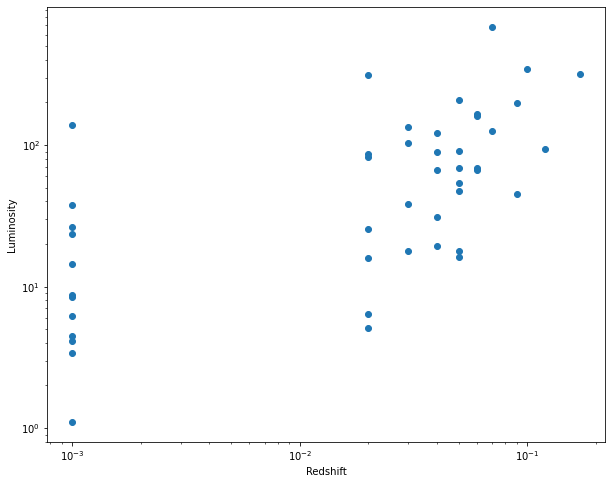

In [13]:
data = np.loadtxt('test.dat')

plt.figure(figsize=(10,8))
plt.scatter(data[:, 1], data[:, 0])
plt.ylabel('Luminosity')
plt.xlabel('Redshift')
plt.xscale('log')
plt.yscale('log')
plt.show()

From the plot we can see that in general, luminosity increases with redshift.\
This indicates a moderate positive correlation between the two.

In [15]:
spearman = st.spearmanr(data[:, 1], data[:, 0])
print(f"SPEARMAN_R\n Correlation Coefficient: {spearman[0]}\n p-value: {spearman[1]}\n")

kendall = st.kendalltau(data[:, 1], data[:, 0])
print(f"KENDALL_TAU\n Correlation Coefficient: {kendall[0]}\n p-value: {kendall[1]}\n")

pearson = st.pearsonr(data[:, 1], data[:, 0])
print(f"PEARSON_R\n Correlation Coefficient: {pearson[0]}\n p-value: {pearson[1]}\n")

SPEARMAN_R
 Correlation Coefficient: 0.6596325957535454
 p-value: 6.16648975908101e-07

KENDALL_TAU
 Correlation Coefficient: 0.5029584682704178
 p-value: 2.9696862274734036e-06

PEARSON_R
 Correlation Coefficient: 0.5144497852670242
 p-value: 0.00025464716576124353



Since the correlation coefficients in the range 0.5-0.7, it is a moderate positive correlation.\
p-value is small which implies that the null hypothesis is rejected.

# Question 3
Wind speed data from the Swiss Wind Power data website can be found at http://wind-data.ch/tools/ \
weibull.php. Using the data provided on the website, plot the probability distribution and overlay the\
best-fit Weibull distribution (with the parameters shown on the website).

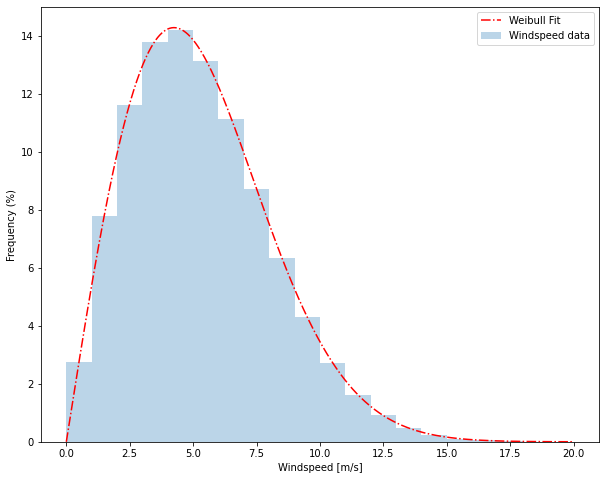

In [16]:
data = pd.read_csv('weibull.dat', sep='\t', header=None)
   
plt.figure(figsize=(10,8))

#Plotting the frequencies
plt.bar(np.linspace(0.5, 20.5, 21)[:-1], data[1],width=1, label='Windspeed data', alpha=0.3)

#Plotting the Weibull Fit
plt.plot(np.linspace(0, 20, 1000), st.dweibull(2, 0, 6).pdf(np.linspace(0, 20, 1000))*200, label='Weibull Fit', c='r', ls = '-.')

plt.xlabel('Windspeed [m/s]')
plt.ylabel('Frequency (%)')
plt.legend()
plt.show()

# Question 4
Generate two arrays of size 1000 drawn from a Gaussian distribution of mean of zero and standard\
deviation of one. Calculate Pearson correlation coefficient and its p−value using scipy module. Also\
check if the p− value agrees with that calculated using the Student-t distibution.

In [17]:
#Generating two random normal distributed samples
norm = [st.norm(0, 1).rvs(1000), st.norm(0, 1).rvs(1000)] 

#p-value from pearson_r
pearson = st.pearsonr(*norm)
print(f"Pearson correlation coefficient r = {pearson.statistic:.5f}\np-value of Pearson = {pearson.pvalue:.5f}")

#p-value from Student's t.cdf
st_t = pearson.statistic * np.sqrt((1000 - 2) / (1 - pearson.statistic ** 2))

pearson_p_manual = 2*(1 - st.t.cdf(np.abs(st_t), 998))
#Absolute value of t is taken because -ve values of r give p-value > 1

print(f'p-value from Students t = {pearson_p_manual:.5f}\nThe p-values match in both cases')  

Pearson correlation coefficient r = -0.02421
p-value of Pearson = 0.44437
p-value from Students t = 0.44437
The p-values match in both cases
